<img src="UOC_Logo.jpg" width=150 height=100  />


# <div align="center">   Data Visualization
### <br><div align="left"> PEC2 Fernando Sevilla 

### Installation of all the required libraries to perform data exploration

In [39]:
#! pip install pandas_profiling


In [40]:
#!pip install plotly==4.14.3


In [1]:
import numpy as np 
import pandas as pd
from pandas_profiling import ProfileReport
from os.path import expanduser as ospath
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

Se crea un dataframe para guardar los datos

In [2]:
df=pd.read_excel(r'/Users/fernandosevilla/Documents/GitHub/UOC_Data_Visualization/Python_Analsis_Visualization/PAX_all_agreements_data_.xlsx')

Peaceagreements database (PA-X) es una colección de datos abiertos, formada por una base de datos de documentos de acuerdos de paz en todo el mundo desde 1990 hasta la actualidad (2019). Se trata de una base de datos creada y mantenida por la Law School de la Universidad de Edimburgo.

Se trata de cerca de 2000 documentos legales. Cada documento tiene más de 260 metadatos. Es posible elegir un dataset dentro de esta base de datos. La web del proyecto permite exportar en formatos abiertos cualquier resultado de busca o resultado de filtrado de los datos, por lo que resulta muy fácil obtener datasets.

* Web del proyecto: https://www.peaceagreements.org/
* Buscador y explorador de datos: https://www.peaceagreements.org/search
* PAX tiene una sección dedicada al género dentro de los procesos de paz. Aquí el buscador, exportador de datos específico: https://www.peaceagreements.org/wsearch


In [3]:
df.shape

(1868, 266)

El dataset contienen más de 266 atributos. Se va arealizar un análisis de los datos y a generar un reporte general. Posteriormente se realizará un análisis mas detallado de los datos selecionados para nuestra visualización

In [4]:
profile = ProfileReport(df, minimal=True, explorative=True, title = "Evaluación inicial del perfil de todos los datos")
# Si se desea exportar como archivo independiente se puede ejecutar la linea comentada siguiente:
profile.to_file(output_file="Total_PA_X_Data_profil.html")

Como se ha comentado el dataset contienen más de 266 atributos pero para el análisis exploratorio detallado se van a revisar tan sólo aquellos atributos que son objeto de nuestra análisis.

El objetivo de nuestro análisis es obtener una visión general de todos los acuerdos existentes a nivel mundial. A continuación se separan todos aquellos tratados que no tengan que ver con problemas territoriales.

Antes de realizar el análisis de los datos se explorará la calidad de los datos. Se realizarán las transformaciones oportunas para facilitar la visualización de los datos.

Finalmente se creará un nuevo conjunto de datos y este será usado para la visualización.

La visualización e llevará a cabo experimentando con diferentes herramientas. 
Para este primer caso se usará python y las librerías oportunas.
Para el segundo caso se usará PowerBi; se crará uán Dasboard a partide del nuevo conjunto de datos generado inicialmente

A continuación se realizará un análisis detallado de los acuerdos por:

- Año
- País
- Región
- Tipo de problema en la definición de estado

Las atributos que se analizarán se listan a continuación y para ayudar a comprender los aspectos específicos de los datos, se comentará cada variable extrayendo la información directamnete del texto explicativo de las variables (Codebook) que se puede encontar en el siguiente enlace (www.peaceagreements.org):

* Con: Country/Entity
* Contp: Conflict type
* Reg: Region
* Agt: Agreement Name
* Dat: Date Signed
* Status: Agreement Definition and Status
* Lgt: Agreement length
* Agtp: Agreement type
* Stage: Agreement stage
* GCh: 1, 2 or 3 if the peace agreement includes any references to children, if not then 0
* StDef: 1 if the peace agreement addresses the issue of state definition, if not then 0
* StGen: 1 if the peace agreement includes any provision that explains the state's core principles, if not then 0
* StCon: State configuration: 1 if the peace agreement includes any declarations and references regarding the territorial nature of the state
* StSd: 1 if the peace agreements includes any refer- ence or provision on the state’s ‘self-determination’.
* StRef: 1 if there are any provisions in the peace agree- ment that refer to a referendum
* StSym: 1 if the peace agreement includes any mention of state symbols
* StInd: 1 if the peace agreement includes any mention of independence of the state or secession of the state
* StUni: 1 if the peace agreement includes any specific pro- visions concerning (external) border delimitation.
* StXbor: 1 if the peace agreement includes any mention of substantive cross-border linkages and connections which involve external involvement in governance 

In [5]:
columns = ['Con' , 'Loc1ISO' ,  'Contp', 'Reg', 'Agt', 'Dat', 'Status', 'Lgt', 
          'Agtp', 'Stage', 'GCh', 'StDef', 'StGen', 'StCon', 'StSd', 
          'StRef', 'StSym', 'StInd', 'StUni', 'StXbor']

## Se crea el nuevo dataframe con la información necesaria para la práctica.  

In [6]:
df2 = df[columns]

In [7]:
df2.head()

,Con,Loc1ISO,Contp,Reg,Agt,Dat,Status,Lgt,Agtp,Stage,GCh,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StXbor
0,Afghanistan,AFG,Government/territory,Europe and Eurasia,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,2,Intra,Pre,0,1,1,0,0,0,0,0,0,0
1,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,4,Intra,SubPar,0,1,0,0,0,0,1,0,0,0
2,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,4,Intra,Imp,2,0,0,0,0,0,0,0,0,0
3,Afghanistan,AFG,Government,Europe and Eurasia,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,14,InterIntra,Imp,1,1,1,0,0,0,0,0,0,1
4,Afghanistan,AFG,Government,Europe and Eurasia,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,7,InterIntra,Pre,1,1,1,0,0,0,0,0,0,0


## Se inicia el análisis exploratorio de la calidad de los datos

In [8]:
df2.describe(include="all")

,Con,Loc1ISO,Contp,Reg,Agt,Dat,Status,Lgt,Agtp,Stage,GCh,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StXbor
count,1868,1833,1868,1868,1868,1868,1868,1868.000000,1868,1868,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
unique,170,82,5,6,1832,1534,4,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bosnia and Herzegovina/Yugoslavia (former),PHL,Government/territory,Africa (excl MENA),Joint Statement,1998-10-26,Multiparty signed/agreed,NaN,Intra,Pre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,133,159,843,584,8,9,1725,NaN,1270,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.274625,NaN,NaN,0.317987,0.330835,0.212527,0.099572,0.042827,0.049786,0.038009,0.031585,0.005889,0.072805
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.194469,NaN,NaN,0.773530,0.470640,0.409205,0.299508,0.202520,0.217561,0.191268,0.174938,0.076532,0.259886
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
df.describe(include="all")

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
count,1868,1868,1868.000000,1868,1868,1868.000000,1868.000000,1868,1868,1868,...,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.0
unique,170,5,NaN,157,6,NaN,NaN,1832,1534,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,NaN,Philippines - Mindanao process,Africa (excl MENA),NaN,NaN,Joint Statement,1998-10-26,Multiparty signed/agreed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,133,843,NaN,124,584,NaN,NaN,8,9,1725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,84.870450,NaN,NaN,1155.105996,1.249465,NaN,NaN,NaN,...,0.177195,0.011242,0.102248,0.300321,0.193790,0.238758,0.009636,0.291756,0.383833,1.0
std,NaN,NaN,42.273883,NaN,NaN,663.722169,0.590838,NaN,NaN,NaN,...,0.553679,0.105459,0.303056,0.608157,0.395372,0.426439,0.097715,0.454692,0.486448,0.0
min,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,NaN,NaN,55.000000,NaN,NaN,568.750000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,NaN,NaN,90.000000,NaN,NaN,1135.500000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,NaN,NaN,123.000000,NaN,NaN,1736.250000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0


In [10]:
# Se obtiene información general del conjunto de datos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Con      1868 non-null   object
 1   Loc1ISO  1833 non-null   object
 2   Contp    1868 non-null   object
 3   Reg      1868 non-null   object
 4   Agt      1868 non-null   object
 5   Dat      1868 non-null   object
 6   Status   1868 non-null   object
 7   Lgt      1868 non-null   int64 
 8   Agtp     1868 non-null   object
 9   Stage    1868 non-null   object
 10  GCh      1868 non-null   int64 
 11  StDef    1868 non-null   int64 
 12  StGen    1868 non-null   int64 
 13  StCon    1868 non-null   int64 
 14  StSd     1868 non-null   int64 
 15  StRef    1868 non-null   int64 
 16  StSym    1868 non-null   int64 
 17  StInd    1868 non-null   int64 
 18  StUni    1868 non-null   int64 
 19  StXbor   1868 non-null   int64 
dtypes: int64(11), object(9)
memory usage: 292.0+ KB


In [11]:
# Se consulta el tamaño del conjunto de datos
nRow, nCol = df2.shape
print(f'Hay {nRow} filas y {nCol} columnas')
print("Nombre de las columnas:", list(df2.columns))

Hay 1868 filas y 20 columnas
Nombre de las columnas: ['Con', 'Loc1ISO', 'Contp', 'Reg', 'Agt', 'Dat', 'Status', 'Lgt', 'Agtp', 'Stage', 'GCh', 'StDef', 'StGen', 'StCon', 'StSd', 'StRef', 'StSym', 'StInd', 'StUni', 'StXbor']


In [12]:
# Se observa en detalle el tipo de datos de cada atributo
data_types = pd.DataFrame({
    'Column': df2.columns.values,
    'Data type': df2.dtypes.values,
    'Null value': df2.isnull().sum(),
    '% of missing values': 100 * df2.isna().sum().values / len(df2)
})
porcentaje=100 * df2.isna().sum().values / len(df2)
print(data_types)
print(f'El valor máximo de valores nulos es {max(porcentaje)} %')

          Column Data type  Null value  % of missing values
Con          Con    object           0             0.000000
Loc1ISO  Loc1ISO    object          35             1.873662
Contp      Contp    object           0             0.000000
Reg          Reg    object           0             0.000000
Agt          Agt    object           0             0.000000
Dat          Dat    object           0             0.000000
Status    Status    object           0             0.000000
Lgt          Lgt     int64           0             0.000000
Agtp        Agtp    object           0             0.000000
Stage      Stage    object           0             0.000000
GCh          GCh     int64           0             0.000000
StDef      StDef     int64           0             0.000000
StGen      StGen     int64           0             0.000000
StCon      StCon     int64           0             0.000000
StSd        StSd     int64           0             0.000000
StRef      StRef     int64           0  

In [13]:
profile = ProfileReport(df2, minimal=False, explorative=True, title = "Evaluación del perfil de los datos")
# Si se desea exportar como archivo independiente se puede ejecutar la linea comentada siguiente:
profile.to_file(output_file="PA_X_Data_profil.html")

/Users/fernandosevilla/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
# Se muestra el informe. 
profile.to_notebook_iframe()

Tras realizar el análisis de la calidad de los datos se ha verificado que:  

1. No existen registros vacios: Todos los atributos están completos
2. No Hay registros duplicados
3. Existen 18 variables categóricas y una numérica
4. Existe una gran correlación entre StDef, StGen y StXbor por loque seguramente la mayor cantidad de acuerdos estarán relacionados con la definición del tipo de estado y la participación externa en la gobernanza.
5. Otra correlación que a simple vista parece interesante es la que existe entre GCh y Lgt. Existe correlación entre la longitud del acuerdo y la implicación de menores en el mismo

Se renombrarán las columnas a continuación y se sustituirá las categoríasnuméricas por texto explicativo

In [15]:
new_columns ={'Con': 'País' ,'Loc1ISO': 'Código_Iso' , 'Contp': 'Conflicto_tipo', 'Reg': 'Región', 'Agt': 'Nombre_Acuerdo', 'Dat': 'Fecha', 
              'Status': 'Estado', 'Lgt': 'Longitud', 'Agtp': 'Acuerdo_tipo', 'Stage': 'Acuerdo_estado',
              'GCh': 'Referencia_menores', 'StDef': 'Estado_definición', 'StGen': 'Estado_carácter', 'StCon' :'Estado_territorio', 
              'StSd': 'Estado_autodeter', 'StRef' :'Etado_referendum', 'StSym': 'Estado_simbología', 'StInd': 'Estado_independ', 
              'StUni': 'Estado_adhesión', 'StXbor': 'Estado_cogobernanza'}

In [16]:
df3 = df2.rename(columns=new_columns)

In [17]:
print("Nombre de las columnas:\n\n", list(df3.columns))

Nombre de las columnas:

 ['País', 'Código_Iso', 'Conflicto_tipo', 'Región', 'Nombre_Acuerdo', 'Fecha', 'Estado', 'Longitud', 'Acuerdo_tipo', 'Acuerdo_estado', 'Referencia_menores', 'Estado_definición', 'Estado_carácter', 'Estado_territorio', 'Estado_autodeter', 'Etado_referendum', 'Estado_simbología', 'Estado_independ', 'Estado_adhesión', 'Estado_cogobernanza']


Se Sustituye la codificación de los valores de las variables por texto explicativo. Adcicionalmente, para ayudar a comprender los aspectos específicos de los datos, se comentará la codificación de cada variable

Referencia_menores:
- 0: Sin referncias
- 1: Una sóla referencia
- 2: Multiples referencias, modo de aplicación y referencia antidiscriminatoria
- 3: El acuerdo se trata fundamentalmente de diposiciones relativas a menores

Estado_definición: (Identidad del estado)
- 0: Sin referencia a la definición de estado
- 1: Sin referencia a la definición del estado

Estado_carácter: (democracia, identidad, etc..)
- 0: Sin referencia a la política de estado
- 1: Con referencia a la política de estado

Estado_territorio: (unitario, federal, etc.)
- 0: Sin referencia a la nnaturaleza territorial del estado
- 1: Con referencia a la nnaturaleza territorial del estado

Estado_autodeter: 
- 0: Sin referencia a la autodeterminación
- 1: Con referencia a la autodeterminación

Etado_referendum: 
- 0: Con referencia a un cambio en la naturaleza, el territorio, la jurisdicción del Estado o un asunto similar
- 1: Sin referencia a un cambio en la naturaleza, el territorio, la jurisdicción del Estado o un asunto similar

Estado_simbología:
- 0: Sin referencia a símbolos del estado
- 1: Con referencia a símbolos del estado

Estado_independ: (Identidad del estado)
- 0: Sin referencia a la independencia del Estado o de la secesión del Estado 
- 1: Con referencia a la independencia del Estado o de la secesión del Estado 

Estado_adhesión: (Identidad del estado)
- 0: Sin referencia a la a la adhesión o a la unificación con otro Estado 
- 1: Con referencia a la a la adhesión o a la unificación con otro Estado 


Estado_cogobernanza: (Grupos subestatales tienen conexión con los grupos "afines" de los Estados vecinos)
- 0: Sin referencia a vínculos y conexiones transfronterizas sustanciales que impliquen la participación externa en la gobernanza
- 1: Con referencia a vínculos y conexiones transfronterizas sustanciales que impliquen la participación externa en la gobernanza


In [18]:
df3['Referencia_menores'] = np.where((df3.Referencia_menores == 0),'Sin referencia','Con referencia')
df3['Estado_definición'] = np.where((df3.Estado_definición == 0),'Sin referencia','Con referencia')
df3['Estado_carácter'] = np.where((df3.Estado_carácter == 0),'Sin referencia','Con referencia')
df3['Estado_territorio'] = np.where((df3.Estado_territorio == 0),'Sin referencia','Con referencia')
df3['Estado_autodeter'] = np.where((df3.Estado_autodeter == 0),'Sin referencia','Con referencia')
df3['Etado_referendum'] = np.where((df3.Etado_referendum == 0),'Sin referencia','Con referencia')

df3['Estado_simbología'] = np.where((df3.Estado_simbología == 0),'Sin referencia','Con referencia')
df3['Estado_independ'] = np.where((df3.Estado_independ == 0),'Sin referencia','Con referencia')
df3['Estado_adhesión'] = np.where((df3.Estado_adhesión == 0),'Sin referencia','Con referencia')
df3['Estado_cogobernanza'] = np.where((df3.Estado_cogobernanza == 0),'Sin referencia','Con referencia')

Para una mejor comprensión se traducen y ajustan los valores de la columna Acuerdo_estado

In [19]:
nombres = {'Imp': 'Implementación', 'Pre': 'Pre-negociación', 'SubPar':'Parcial' , 'SubComp':'Integral' ,
         'Cea': 'Alto el fuego', 'Ren': 'Renovación' , 'Oth': 'Otros'}

df3['Acuerdo_estado'] = df3['Acuerdo_estado'].map(nombres)  

In [20]:
df3.head()

,País,Código_Iso,Conflicto_tipo,Región,Nombre_Acuerdo,Fecha,Estado,Longitud,Acuerdo_tipo,Acuerdo_estado,Referencia_menores,Estado_definición,Estado_carácter,Estado_territorio,Estado_autodeter,Etado_referendum,Estado_simbología,Estado_independ,Estado_adhesión,Estado_cogobernanza
0,Afghanistan,AFG,Government/territory,Europe and Eurasia,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,2,Intra,Pre-negociación,Sin referencia,Con referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia
1,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,4,Intra,Parcial,Sin referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia
2,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,4,Intra,Implementación,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia
3,Afghanistan,AFG,Government,Europe and Eurasia,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,14,InterIntra,Implementación,Con referencia,Con referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia
4,Afghanistan,AFG,Government,Europe and Eurasia,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,7,InterIntra,Pre-negociación,Con referencia,Con referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia


Se ha detectado durante la comprensión de los datos que algunas variables hacer referencia a la identidad del estado. Se crará una nueva variable que agrupe a todas estas variables.

In [21]:
def label_indent (row):
    if row['Estado_definición'] == 'Con referencia' :
        return 'Con referencia'
    if row['Estado_independ'] == 'Con referencia' :
        return 'Con referencia'
    if row['Estado_adhesión'] == 'Con referencia' :
        return 'Con referencia'
    return 'Sin referencia'

In [22]:
df3.apply (lambda row: label_indent(row), axis=1)

0       Con referencia
1       Con referencia
2       Sin referencia
3       Con referencia
4       Con referencia
             ...      
1863    Sin referencia
1864    Con referencia
1865    Con referencia
1866    Con referencia
1867    Con referencia
Length: 1868, dtype: object

In [23]:
df3['Estado_identidad'] = df3.apply (lambda row: label_indent(row), axis=1)

Se crean nuevas columnas para separar la fecha y los paises

In [24]:
df3['Países_envueltos'] = df3['País'].apply(str.split, args = '/')
df3['Día'] = df3['Fecha'].apply(lambda date : int(date.split('-')[2]))
df3['Mes'] = df3['Fecha'].apply(lambda date : int(date.split('-')[1]))
df3['Año'] = df3['Fecha'].apply(lambda date : int(date.split('-')[0]))

In [25]:
df3.head()

,País,Código_Iso,Conflicto_tipo,Región,Nombre_Acuerdo,Fecha,Estado,Longitud,Acuerdo_tipo,Acuerdo_estado,...,Etado_referendum,Estado_simbología,Estado_independ,Estado_adhesión,Estado_cogobernanza,Estado_identidad,Países_envueltos,Día,Mes,Año
0,Afghanistan,AFG,Government/territory,Europe and Eurasia,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,2,Intra,Pre-negociación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,[Afghanistan],8,7,2019
1,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,4,Intra,Parcial,...,Sin referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,[Afghanistan],22,9,2016
2,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,4,Intra,Implementación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,[Afghanistan],21,9,2014
3,Afghanistan,AFG,Government,Europe and Eurasia,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,14,InterIntra,Implementación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,Con referencia,[Afghanistan],8,7,2012
4,Afghanistan,AFG,Government,Europe and Eurasia,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,7,InterIntra,Pre-negociación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,[Afghanistan],5,12,2011


### El Dataframe está listo para ser visualizado y por tanto se exportará como archivo Excel para poder utilizarlos en otras aplicaciones y poder realizar la experimentación

In [26]:
df3.to_excel("PAX_optimizado.xlsx") 

### Estudio de la distribución geográfica

In [27]:
paises_lista = {}
for num, acuerdo in df3.iterrows():
    for pais in acuerdo['Países_envueltos']:
        if pais.strip('()') not in paises_lista: 
            paises_lista[pais.strip('()')] = 1
        else:
            paises_lista[pais.strip('()')] += 1
pais_df = pd.DataFrame.from_dict(paises_lista, orient = 'index', columns=['Acuerdos firmados'])

code_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

def return_country_code(con):
    if con in code_df['COUNTRY'].values:
        return code_df[code_df['COUNTRY'] == con]['CODE'].values[0]

pais_df['País'] = pais_df.index
pais_df['Código'] = pais_df['País'].apply(return_country_code)
paises = pais_df.dropna()

In [28]:
data=dict(
    type = 'choropleth',
    locations = paises['Código'],
    z = paises['Acuerdos firmados'],
    text = paises['País'],
    colorscale = 'Greys',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Peace Treaties Signed',
)


layout = dict(title_text='Acierdos de paz desde 1990',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)
iplot(fig)

Filipinas es el país que más acuerdos de paz ha firmado desde 1990, seguido de Bosnia Herzegovina, Colombia y Sudán. Vemos que cada región está "liderada" por un país que ha firmado un gran número de acuerdos.

Me sorprendió ver que Francia y Alemania han firmado uno, aquí está el acuerdo correspondiente para los interesados : https://en.wikipedia.org/wiki/Treaty_on_the_Final_Settlement_with_Respect_to_Germany

## Situación de los acuerdos firmados y su reparto regional

In [41]:
df_RAP=df3.groupby(['Región','Acuerdo_estado']).count()['País'].reset_index()

fig = px.bar(df_RAP, x="Región", y="País", color='Acuerdo_estado' , title="Long-Form Input")
fig.show()

De los resultados del gráfico se observan los siguientes puntos:

* África tiene una gran proporción de acuerdos de paz 'Parciales'
* En Europa, Asia y Pacífico y América, la granmayoría de los acuerdos se encuentran en "prenegociación", lo que significa que "pretenden que las partes lleguen al punto de negociar las incompatibilidades que están en el centro del conflicto". Esto también ilustra la actitud mayoritariamente "diplomática" de los países europeos a la hora de abordar los conflictos.
* La mayoría de los alto el fuego se produjeron en África, Europa y Asia
* La renovación de los acuerdos es mínima.

Para continuar con los paises se representa a continuación un "Word Cloud" para, de una manera más visual, ver si algún país aparece más que los otros.

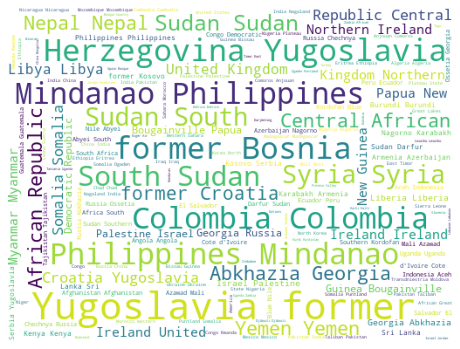

In [42]:
from wordcloud import WordCloud
pais = df3.País
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(pais))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

El conflicto de Yugoslavia y su disgregación se muestra resaltado así como Colombia y Filipinas.  

Concretaemnete en antigua Yugoslavia tuvieron lugar Las guerras yugoslavas, las cuales fueron una serie de conflictos en el territorio de la antigua Yugoslavia, que se sucedieron entre 1991 y 2001. Comprendieron dos grupos de guerras sucesivas que afectaron a las seis ex repúblicas yugoslavas.
[Guerras yugoslavas](https://es.wikipedia.org/wiki/Guerras_yugoslavas)

En octubre de 2012, tras años de negociaciones entre el gobierno filipino y el Frente Moro de Liberación Islámica (FMLI), las partes lograron alcanzar un acuerdo esencial para ponerle fin a una de las expresiones conflictivas más complejas del país y del sudeste asiático. Para los frentes moros de liberación, se trata de una lucha para recuperar la soberanía histórica sobre su territorio ancestral; para el gobierno filipino, es una cuestión de defensa de la integridad del territorio contra las amenazas de secesión. A pesar de ello, y no obstante las dificultades y obstáculos para lograr el fin de la confrontación, hoy estas reivindicaciones, en esencia contradictorias, parecen haber encontrado un camino a la re- conciliación.  
[Los procesos de paz en Filipinas](https://expeditiorepositorio.utadeo.edu.co/bitstream/handle/20.500.12010/9451/210.pdf?sequence=1&isAllowed=y)

El Conflicto Armado Interno de Colombia es una guerra asimétrica de baja intensidad que se desarrolla en Colombia desde 1960 y que se extiende hasta la actualidad. Con antecedentes y causas directas de la etapa conocida como La Violencia, que enfrentó a los partidos Liberal y Conservador (aproximadamente entre 1928-1958). Los principales actores involucrados han sido el Estado colombiano, las guerrillas de extrema izquierda y los grupos paramilitares de extrema derecha. A estos se le han sumado los carteles del narcotráfico, las llamadas bandas criminales (Bacrim), y Grupos Armados Organizados (GAO).  
[Conflicto Armado Interno de Colombia](https://es.wikipedia.org/wiki/Conflicto_armado_interno_de_Colombia)

## Situación de los acuerdos por asuntos de identidad de estado

In [43]:
df_REP=df3.groupby(['Región','Estado_identidad']).count()['Países_envueltos'].reset_index()
df_REP2=df3.groupby('Región').count()['Países_envueltos'].reset_index()

In [44]:
fig = px.bar(df_REP, x="Región", y="Países_envueltos", color='Estado_identidad' , 
             title="Acuerdos con mención o referencia a la identidad del estado ")
fig.show()

De la visualización obtenemos la siguiente infoemación:
-  Todas las regiones tienen menos acuerdos de paz originados por conflictos relacionados con la identidad del estado


In [32]:
layout = dict(title_text='Extensión de los tratados de paz por regiones ',
             barmode = 'stack')
data = [
    go.Bar(name='Menos de 2 páginas', x=df3[df3['Longitud'] <= 2].groupby('Región').count()['País'].index, y=df3[df3['Longitud'] <= 2].groupby('Región').count()['País'].values),
    go.Bar(name='Entre 2 y 6 páginas', x=df3[(df3['Longitud'] > 2) & (df3['Longitud'] <= 6)].groupby('Región').count()['País'].index, y=df3[(df3['Longitud'] > 2) & (df3['Longitud'] <= 6)].groupby('Región').count()['País'].values),
    go.Bar(name='Más de 6 páginas', x=df3[df3['Longitud'] > 6].groupby('Región').count()['País'].index, y=df3[df3['Longitud'] > 6].groupby('Región').count()['País'].values)
]
fig = go.Figure(data=data, layout = layout)
fig.show()

Este gráfico se deduce la siguiente afirmación:
- La situación más compleja actualmente se encuentra en África. Es la región con más tratados.

Adicionamete y atendiendo a la distribución de los tratados, Africa es la que más tratados extenso tiene, de esto se deduce como de compleja es la situcaión en áfrica.

## Situación en detalle de los tratados de más de 6 páginas

In [33]:
df3[df3['Longitud'] > 6]
lista_paises = {}
for num, acuerdos in df3[df3['Longitud'] > 6].iterrows():
    for pais in acuerdos['Países_envueltos']:
        if pais.strip('()') not in lista_paises: 
            lista_paises[pais.strip('()')] = 1
        else:
            lista_paises[pais.strip('()')] += 1
pais_df = pd.DataFrame.from_dict(lista_paises, orient = 'index', columns=['Cantidad de tratados'])

pais_df['Country'] = pais_df.index
pais_df['Code'] = pais_df['Country'].apply(return_country_code)
pais = pais_df.dropna()
data=dict(
    type = 'choropleth',
    locations = pais['Code'],
    z = pais['Cantidad de tratados'],
    text = pais['Country'],
    colorscale = 'Greys',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Nº tratados firmados',
)

layout = dict(title_text='Paises que han firmado tratados extensos desde 1990',
              geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)
iplot(fig)

Sudán y Sudán del Sur los que han firmado más acuerdos de paz largos. Esto puede mostrar lo compleja que es la situación en esta región.

## Evolución temporal

/Users/fernandosevilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/fernandosevilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Peace agreements per month')

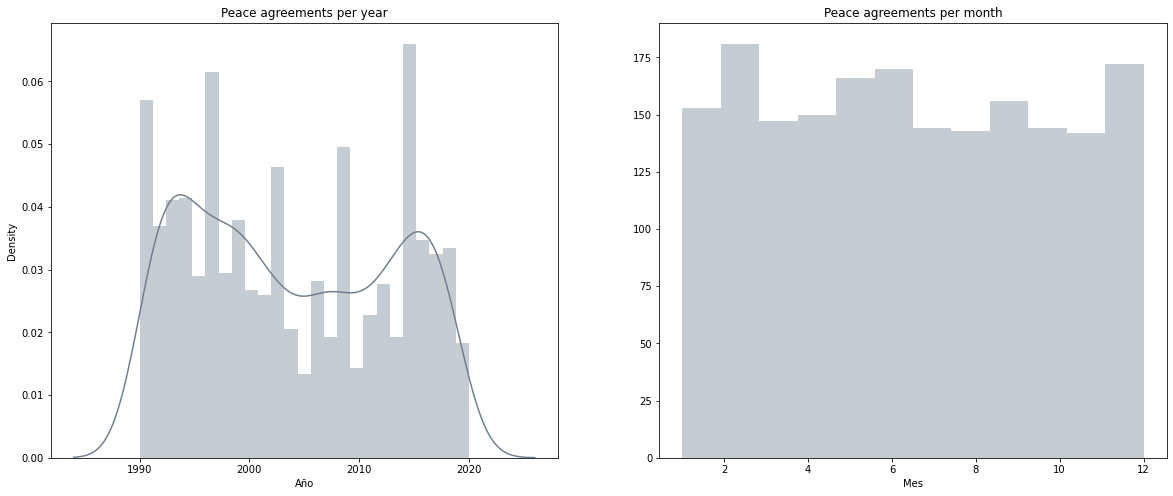

In [34]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.distplot(df3['Año'], kde = True, bins = 25, color='slategrey').set_title('Peace agreements per year')
plt.subplot(122)
sns.distplot(df3['Mes'], kde = False, color='slategrey').set_title('Peace agreements per month')

In [35]:
import plotly.express as px

df3['Fecha'] = pd.to_datetime(df3['Fecha'])

df_grouped = (
    df3.groupby(
        # normalize all dates to start of month
        df3['Fecha'].astype('datetime64[M]')
    )['Región'].count().rename('Count').to_frame()
)


#print(df_grouped)

fig = px.line(
    df_grouped, 
    y='Count', 
    title='<b>Acuerdos por fecha (Mes/Año)</b>',
    #hover_data=['Names']
)
#fig.write_html('fig1.html', auto_open=True)
iplot(fig)

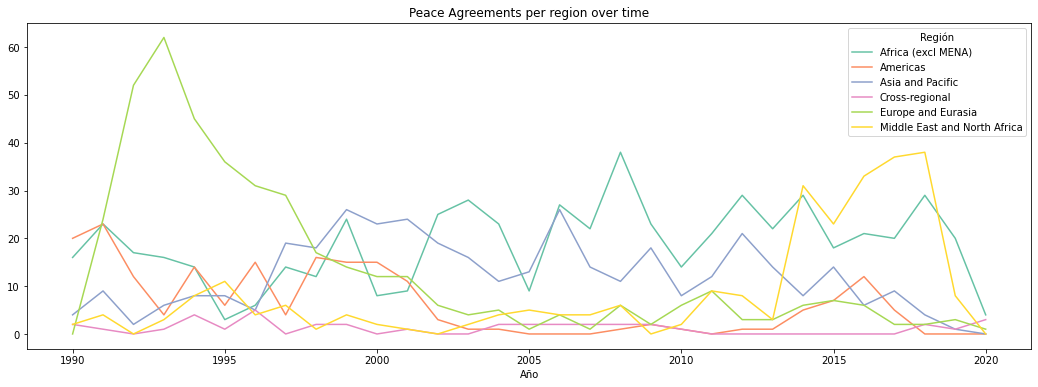

In [36]:
regions_evolution = pd.crosstab(df3.Año,df3.Región)
regions_evolution.plot(color=sns.color_palette('Set2',12), title='Peace Agreements per region over time')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Los datos de Europa/Eurasia muestran claramente un pico, el cual coincide con la situación vivida en en Yugoslavia en la década de los noventa.  

Es interesante también el pico en oriente medio y el norte de áfrica. Entre las circunstancias internacionales actuales más relevantes para comprender el estado de la política mundial se encuentra, sin duda, la sucesión de las crisis que estallaron en el Magreb y el Medio Oriente desde finales del año 2010 y, con creciente intensidad, a lo largo de 2011, prolongándose todas ellas, de una u otra forma, hasta el presente,como por ejemplo la “primavera árabe”.

## Análisis de laos acurdos referentes a autodeterminación

In [37]:
xauto =  df3.Estado_autodeter[df3.Estado_autodeter == 'Con referencia']
sauto = df3.Estado_autodeter[df3.Estado_autodeter == 'Sin referencia']

trace1 = go.Histogram(
    x=xauto,
    opacity=0.75,
    name = "Por autodeterminación",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=sauto,
    opacity=0.75,
    name = "Sin autodeterminación",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Acuerdos derivados por prolemas de autodeterminación',
                   xaxis=dict(title='Tipo'),
                   yaxis=dict( title='Cantidad'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Casi la totalidad de los acuerdos no tienen por motivo asuntos relacionados con la autodeterminación.  

Nos fijamos ahora en aquellos que sí hacen referencia a la autodeterminación para analizar que países han tenido más conflictos

In [65]:
df_auto=df3[['País', 'Año']][df3.Estado_autodeter == 'Con referencia']

In [79]:
df_grouped = (
    df_auto.groupby(
        # normalize all dates to start of month
        df3['País']
    )['Año'] \
    .count() \
    .rename('Count') \
    .reset_index(name = 'Count') \
    .sort_values(['Count'], ascending=False) \
    
)
df_grouped.head()


,País,Count
31,South Sudan/Sudan,13
34,Sri Lanka,5
28,Russia/Chechnya,5
22,Myanmar,5
27,Philippines/Mindanao,4


In [78]:
fig = px.bar(df_grouped, x="País", y="Count" ,
             title="Acuerdos con mención o referencia a la identidad del estado ")
fig.show()

El conflicto de Sudán aparece claramente tras el análisis:

La guerra civil de Sudán del Sur fue un conflicto político de Sudán del Sur entre las fuerzas gubernamentales y opositores de Salva Kiir. Comenzó el 14 de diciembre de 2013, cuando una facción del Ejército de Liberación del Pueblo de Sudán intentó efectuar un golpe de Estado en Sudán del Sur. El presidente de país, Salva Kiir, afirmó que el intento fue sofocado el día siguiente, pero el día 16 se retomó la lucha y el conflicto siguió hasta el año 2018, cuando comenzó el diálogo de paz entre los bandos, que dio fin al Conflicto armado a inicios del 2020  
[Guerra civil de Sudán del Sur](https://es.wikipedia.org/wiki/Guerra_civil_de_Sudán_del_Sur).  



## Análisis de los acurdos referentes a referendum

In [38]:
xauto =  df3.Etado_referendum[df3.Etado_referendum == 'Con referencia']
sauto = df3.Etado_referendum[df3.Etado_referendum == 'Sin referencia']

trace1 = go.Histogram(
    x=xauto,
    opacity=0.75,
    name = "Por Referendum",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=sauto,
    opacity=0.75,
    name = "Sin Referendum",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Acuerdos derivados de Referendum',
                   xaxis=dict(title='Tipo'),
                   yaxis=dict( title='Cantidad'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Como en el caso anterio casi la totalidad de los acuerdos no tienen por motivo asuntos relacionados con la referendums

In [80]:
df_ref=df3[['País', 'Año']][df3.Etado_referendum == 'Con referencia']

In [81]:
df_grouped = (
    df_auto.groupby(
        # normalize all dates to start of month
        df_ref['País']
    )['Año'] \
    .count() \
    .rename('Count') \
    .reset_index(name = 'Count') \
    .sort_values(['Count'], ascending=False) \
    
)
df_grouped.head()

,País,Count
10,South Sudan/Sudan,12
5,Morocco/(Western Sahara),3
6,Palestine,2
0,Bosnia and Herzegovina/Yugoslavia (former),1
1,Cambodia,1


In [82]:
fig = px.bar(df_grouped, x="País", y="Count" ,
             title="Acuerdos con mención o referencia a la identidad del estado ")
fig.show()

De nuevo aparece el conflicto entre Sudán y Sudán del sur en la primera posición.

Tras el aálisis de los datos se verifica que uno de los conflictos que más trataddos de paz ha originado es el conflicto de Sudán. 
El análisis demuestra la situación tan compleja que se vivií durante los últimos años en Sudán.
